In [2]:
day_0 = r"C:\Users\edgar\OneDrive\Documents\Code\OptRLResearch\IMC\orchids strat\round-2-island-data-bottle (1)\prices_round_2_day_-1.csv"
day_1 = r"C:\Users\edgar\OneDrive\Documents\Code\OptRLResearch\IMC\orchids strat\round-2-island-data-bottle (1)\prices_round_2_day_0.csv"
day_2 = r"C:\Users\edgar\OneDrive\Documents\Code\OptRLResearch\IMC\orchids strat\round-2-island-data-bottle (1)\prices_round_2_day_1.csv"

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

day0 = pd.read_csv(day_0, sep=";")
day1 = pd.read_csv(day_1, sep=";")
day2 = pd.read_csv(day_2, sep=";")

day1["timestamp"] += 1000000
day2["timestamp"] += 2000000

data = pd.concat([day0, day1, day2])
data = data.set_index("timestamp")
data["next_n_orchids"] = data["ORCHIDS"].shift()
data = data.drop("DAY", axis = 1)
data = data.dropna()
print(data)

           ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF   SUNLIGHT  \
timestamp                                                                     
100        1201.75             1.5            9.5           -2.0  2499.4197   
200        1201.75             1.5            9.5           -2.0  2498.8457   
300        1201.75             1.5            9.5           -2.0  2498.2780   
400        1201.75             1.5            9.5           -2.0  2497.7166   
500        1200.25             1.5            9.5           -2.0  2497.1614   
...            ...             ...            ...            ...        ...   
2999600    1036.25             0.9            9.5           -5.0  2299.9436   
2999700    1036.25             0.9            9.5           -5.0  2299.9556   
2999800    1036.25             0.9            9.5           -5.0  2299.9690   
2999900    1034.25             0.9            9.5           -5.0  2299.9840   
3000000    1035.25             0.9            9.5   

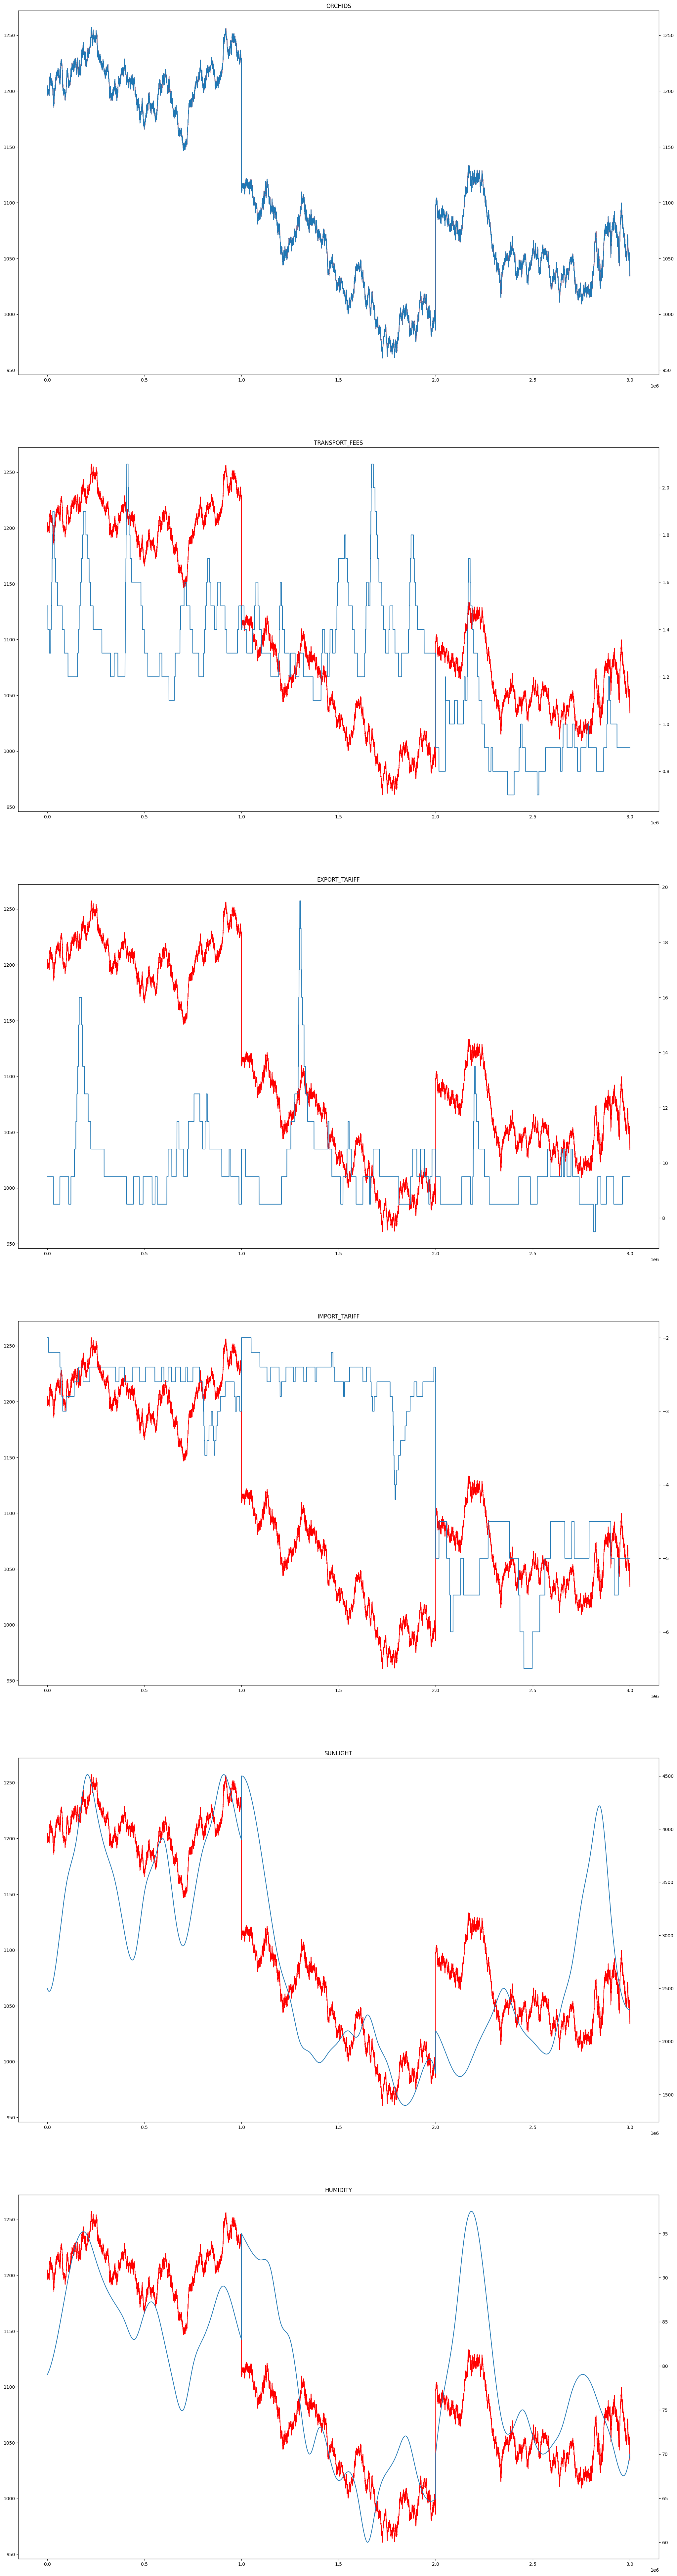

In [3]:
fig, ax = plt.subplots(len(data.columns) - 1, figsize = (25,100))
for i in range(len(data.columns) - 1):
        ax[i].set_title(data.columns[i])
        rand = ax[i].twinx()
        ax[i].plot(data.index, data["next_n_orchids"], c = "r")
        rand.plot(data.index, data[data.columns[i]])
    

plt.show()

In [50]:
data_x = data[["SUNLIGHT"]]
for i in range(5):
    data_x[f"SUNLIGHT-{i + 1}"] = data_x["SUNLIGHT"].shift(i)
data_x = data_x.dropna()
data_y = data_x["SUNLIGHT"].shift(-1)
data_y.dropna()
data_x


C:\Users\edgar\AppData\Local\Temp\ipykernel_2404\223448413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x[f"SUNLIGHT-{i + 1}"] = data_x["SUNLIGHT"].shift(i)
C:\Users\edgar\AppData\Local\Temp\ipykernel_2404\223448413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x[f"SUNLIGHT-{i + 1}"] = data_x["SUNLIGHT"].shift(i)
C:\Users\edgar\AppData\Local\Temp\ipykernel_2404\223448413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,SUNLIGHT,SUNLIGHT-1,SUNLIGHT-2,SUNLIGHT-3,SUNLIGHT-4,SUNLIGHT-5
timestamp,,,,,,
500,2497.1614,2497.1614,2497.7166,2498.2780,2498.8457,2499.4197
600,2496.6125,2496.6125,2497.1614,2497.7166,2498.2780,2498.8457
700,2496.0698,2496.0698,2496.6125,2497.1614,2497.7166,2498.2780
800,2495.5334,2495.5334,2496.0698,2496.6125,2497.1614,2497.7166
900,2495.0032,2495.0032,2495.5334,2496.0698,2496.6125,2497.1614
...,...,...,...,...,...,...
2999600,2299.9436,2299.9436,2299.9330,2299.9238,2299.9160,2299.9097
2999700,2299.9556,2299.9556,2299.9436,2299.9330,2299.9238,2299.9160
2999800,2299.9690,2299.9690,2299.9556,2299.9436,2299.9330,2299.9238


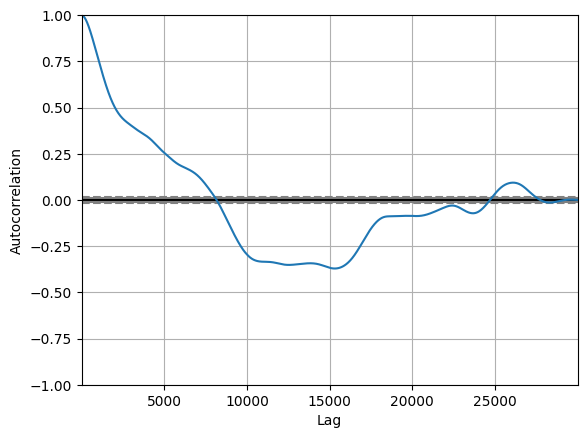

In [31]:
from pandas.plotting import autocorrelation_plot

ax = autocorrelation_plot(data_x["SUNLIGHT"])
plt.show()

In [51]:
data_y[data_y.isnull()]

timestamp
3000000   NaN
Name: SUNLIGHT, dtype: float64

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


x_train, x_test, y_train, y_test = train_test_split(data_x, data_y)
poly = PolynomialFeatures(degree = 6, include_bias = False)
poly_features = poly.fit_transform(data_x)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, data_y)

ValueError: Input y contains NaN.

In [34]:
print(mean_squared_error(y_test, preds))

1649003.8936091515
